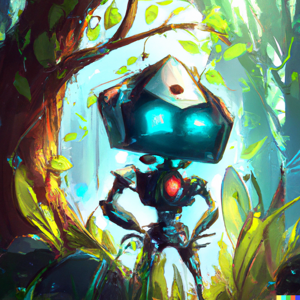

In [22]:
from PIL import Image
smol_forest_guardian = Image.open("./DALL·E-digital_art_cute_solarpunk_forest_guardian_robot.png")
smol_forest_guardian.resize((300,300))

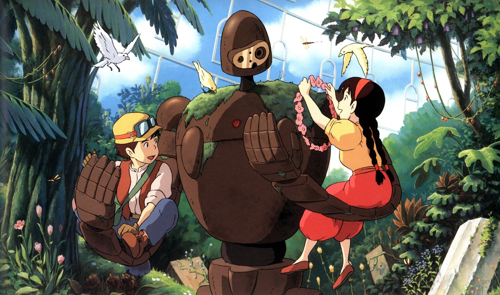

In [21]:
big_guardian = Image.open("./castle_in_sky_guardian.jpg")
ratio = 0.25
new_dimens = (round(big_guardian.width * ratio), round(big_guardian.height * ratio))

big_guardian.resize(new_dimens)

https://www2.deloitte.com/nl/nl/pages/consumer/solutions/ai4animals.html in the use cases example

Surprising intuitive things
- transfer leaning makes creating something somewhat useful quick
- confusion matrix
- training, validation, test sets
- you don't need a GPU to deploy a model necessarily

In [2]:
1 + 1

2